# DAPA CA Breast Cancer Diagnosis Prediction - Random Forest Model.

## Import Required Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns # boxplot, histplot
import matplotlib.pyplot as plt # plot

from sklearn.model_selection import train_test_split
#!pip3 install imblearn
from imblearn.over_sampling import SMOTE # Balance the data

from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression # Logistic Regression Model

#!pip3 install statsmodels
import statsmodels.api as sm # Statistics for the datasets

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

 ## Load Data
 Dataset: Mammography Data from Breast Cancer Surveillance Consortium
 
 https://datahub.io/JohnSnowLabs/mammography-data-from-breast-cancer-surveillance-consortium#data

In [2]:
#Load Data In Pandas
df = pd.read_csv(r"C:\Users\anton\Documents\Postgraduate Diploma in Data Analytics {PGDDA-JAN 2003}\Year 1  Semester 3\Domain Applications of Predictive Analytics\2023\Project\Project (Draft)\Data\Data Project\clean_data_breast_cancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               39998 non-null  int64 
 1   Age_At_The_Time_Of_Mammography           39998 non-null  int64 
 2   Radiologists_Assessment                  39998 non-null  object
 3   Is_Binary_Indicator_Of_Cancer_Diagnosis  39998 non-null  int64 
 4   Comparison_Mammogram_From_Mammography    39998 non-null  int64 
 5   Patients_BI_RADS_Breast_Density          39998 non-null  object
 6   Family_History_Of_Breast_Cancer          39998 non-null  int64 
 7   Current_Use_Of_Hormone_Therapy           39998 non-null  int64 
 8   Binary_Indicator                         39998 non-null  int64 
 9   History_Of_Breast_Biopsy                 39998 non-null  int64 
 10  Is_Film_Or_Digital_Mammogram             39998 non-null  i

## Data Preprocess
### Drop Patients_Study_ID column

In [3]:
# Drop the column Patiens_Study_ID column, since it is no effect of prediction
# Becareful do NOT drop again.
df = df.drop('Patients_Study_ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               39998 non-null  int64 
 1   Age_At_The_Time_Of_Mammography           39998 non-null  int64 
 2   Radiologists_Assessment                  39998 non-null  object
 3   Is_Binary_Indicator_Of_Cancer_Diagnosis  39998 non-null  int64 
 4   Comparison_Mammogram_From_Mammography    39998 non-null  int64 
 5   Patients_BI_RADS_Breast_Density          39998 non-null  object
 6   Family_History_Of_Breast_Cancer          39998 non-null  int64 
 7   Current_Use_Of_Hormone_Therapy           39998 non-null  int64 
 8   Binary_Indicator                         39998 non-null  int64 
 9   History_Of_Breast_Biopsy                 39998 non-null  int64 
 10  Is_Film_Or_Digital_Mammogram             39998 non-null  i

### Drop rows with missing values

In [4]:
# Drop rows with missing values NaN
df.dropna()
df.info() # there is no change at this stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               39998 non-null  int64 
 1   Age_At_The_Time_Of_Mammography           39998 non-null  int64 
 2   Radiologists_Assessment                  39998 non-null  object
 3   Is_Binary_Indicator_Of_Cancer_Diagnosis  39998 non-null  int64 
 4   Comparison_Mammogram_From_Mammography    39998 non-null  int64 
 5   Patients_BI_RADS_Breast_Density          39998 non-null  object
 6   Family_History_Of_Breast_Cancer          39998 non-null  int64 
 7   Current_Use_Of_Hormone_Therapy           39998 non-null  int64 
 8   Binary_Indicator                         39998 non-null  int64 
 9   History_Of_Breast_Biopsy                 39998 non-null  int64 
 10  Is_Film_Or_Digital_Mammogram             39998 non-null  i

### Detect Duplicated Rows and Drop Duplicates

In [5]:
df.duplicated(df,keep=False)
df.drop_duplicates(df,keep=False)
df.info() # No Duplicated Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               39998 non-null  int64 
 1   Age_At_The_Time_Of_Mammography           39998 non-null  int64 
 2   Radiologists_Assessment                  39998 non-null  object
 3   Is_Binary_Indicator_Of_Cancer_Diagnosis  39998 non-null  int64 
 4   Comparison_Mammogram_From_Mammography    39998 non-null  int64 
 5   Patients_BI_RADS_Breast_Density          39998 non-null  object
 6   Family_History_Of_Breast_Cancer          39998 non-null  int64 
 7   Current_Use_Of_Hormone_Therapy           39998 non-null  int64 
 8   Binary_Indicator                         39998 non-null  int64 
 9   History_Of_Breast_Biopsy                 39998 non-null  int64 
 10  Is_Film_Or_Digital_Mammogram             39998 non-null  i

### Dealing with Categorical Data

In [6]:
# Convert categorical string or boolean values into integers
for colname in df.loc[:, df.dtypes == object]:
    print(colname,': ',df[colname].unique())

for colname in df.loc[:, df.dtypes == bool]:
    print(colname, ': ', df[colname].unique())

Radiologists_Assessment :  ['Negative' 'Needs additional imaging' 'Benign findings' 'Probably benign'
 'Suspicious abnormality' 'Highly suggestive of malignancy']
Patients_BI_RADS_Breast_Density :  ['Scattered fibroglandular densities' 'Extremely dense'
 'Heterogeneously dense' 'Almost entirely fatty']
Cancer_Type :  ['No cancer diagnosis' 'Invasive cancer' 'ductal carcinoma in situ']


In [7]:
# Change all columns with values only 'yes' or 'no' to 1 and 0 respectively
# Convert boolean values True to 1 and False to 0
yes_no_mapping={'Yes': 1, 'No': 0}
true_false_mapping ={True: 1, False: 0}

# to_int function is used to convert values under a col_name based on a specific mapping
def to_int(col_name, mapping):
    df[col_name] = df[col_name].map(mapping)
    
to_int('Comparison_Mammogram_From_Mammography', yes_no_mapping)
to_int('Family_History_Of_Breast_Cancer', yes_no_mapping)
to_int('Current_Use_Of_Hormone_Therapy', yes_no_mapping)
to_int('Binary_Indicator', yes_no_mapping)
to_int('History_Of_Breast_Biopsy', yes_no_mapping)

to_int('Is_Binary_Indicator_Of_Cancer_Diagnosis', true_false_mapping)
to_int('Is_Film_Or_Digital_Mammogram', true_false_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               39998 non-null  int64  
 1   Age_At_The_Time_Of_Mammography           39998 non-null  int64  
 2   Radiologists_Assessment                  39998 non-null  object 
 3   Is_Binary_Indicator_Of_Cancer_Diagnosis  0 non-null      float64
 4   Comparison_Mammogram_From_Mammography    0 non-null      float64
 5   Patients_BI_RADS_Breast_Density          39998 non-null  object 
 6   Family_History_Of_Breast_Cancer          0 non-null      float64
 7   Current_Use_Of_Hormone_Therapy           0 non-null      float64
 8   Binary_Indicator                         0 non-null      float64
 9   History_Of_Breast_Biopsy                 0 non-null      float64
 10  Is_Film_Or_Digital_Mammogram             0 non

In [8]:
for colname in df.loc[:, df.dtypes == object]:
    print(colname,': ',df[colname].unique())

Radiologists_Assessment :  ['Negative' 'Needs additional imaging' 'Benign findings' 'Probably benign'
 'Suspicious abnormality' 'Highly suggestive of malignancy']
Patients_BI_RADS_Breast_Density :  ['Scattered fibroglandular densities' 'Extremely dense'
 'Heterogeneously dense' 'Almost entirely fatty']
Cancer_Type :  ['No cancer diagnosis' 'Invasive cancer' 'ductal carcinoma in situ']


### Convert to a csv file

In [9]:
# This is NOT a necessary step. This file is only used to see the outcomes of the above process.
df.to_csv('clean_data_breast_cancer.csv', encoding='utf-8')

## Data Exploration

(https://linguisticmaz.medium.com/random-forest-classifier-in-python-1a6f4c783afa)

Got idea and some source code from this webpage, do some modifications to fit datasets in this research study.

In [10]:
df['Is_Film_Or_Digital_Mammogram'].value_counts()

Series([], Name: Is_Film_Or_Digital_Mammogram, dtype: int64)

In [11]:
ax_way=sns.countplot(x='Is_Film_Or_Digital_Mammogram', data=df, palette='hls')
plt.bar_label(ax_way.containers[0])
plt.show()
count_Film = len(df[df['Is_Film_Or_Digital_Mammogram']==0])
count_Digital = len(df[df['Is_Film_Or_Digital_Mammogram']==1])
pct_of_Film = count_Film/(count_Film+count_Digital)
print("Percentage of Film is:", pct_of_Film*100)
pct_of_Digital = count_Digital/(count_Film+count_Digital)
print("Percentage of Digital is:", pct_of_Digital*100)

ValueError: min() arg is an empty sequence

Observations: 

There are nearly half digital mammography, and half film mammography, hence, there is no bias in the mammography ways. However, when split training dataset and test dataset, these two approaches are need to considered.

In [ ]:
ax_cancer=sns.countplot(x='Is_Binary_Indicator_Of_Cancer_Diagnosis', data=df, palette='hls')
plt.bar_label(ax_cancer.containers[0])
plt.show()
count_No_Cancer = len(df[df['Is_Binary_Indicator_Of_Cancer_Diagnosis']==0])
count_Cancer = len(df[df['Is_Binary_Indicator_Of_Cancer_Diagnosis']==1])

pct_of_No_Cancer = count_No_Cancer/(count_No_Cancer+count_Cancer)
print("Percentage of no cancer is:", pct_of_No_Cancer*100)
pct_of_Cancer = count_Cancer/(count_No_Cancer+count_Cancer)
print("Percentage of cancer is:", pct_of_Cancer*100)

Observations: 

The classes of cancer diagnosis are imbalanced. If we train such dataset directly, the model will be biased to the majority class, i.e. the no cancer diagnosis. Before to balance the classes, we do more exploration.

In [ ]:
ax_cancer_type=sns.countplot(x='Cancer_Type', data=df, palette='hls')
plt.bar_label(ax_cancer_type.containers[0])
plt.show()
count_noCancer = len(df[df['Cancer_Type']=='No cancer diagnosis'])
count_invasive = len(df[df['Cancer_Type']=='Invasive cancer'])
count_ductal = len(df[df['Cancer_Type']=='ductal carcinoma in situ'])

pct_of_noCancer = count_noCancer/(count_noCancer+count_invasive+count_ductal)
print("Percentage of no cancer is:", pct_of_noCancer*100)
pct_of_invasive = count_invasive/(count_noCancer+count_invasive+count_ductal)
print("Percentage of invasive cancer is:", pct_of_invasive*100)
pct_of_ductal = count_ductal/(count_noCancer+count_invasive+count_ductal)
print("Percentage of ductal carcinoma in situ is:", pct_of_ductal*100)

### Numeric Predictors

In [ ]:
df.groupby('Is_Binary_Indicator_Of_Cancer_Diagnosis').mean(numeric_only=True)

Observations:

1. The mean age of cancer diagnosis is higher than the mean ago of no cancer diagnosis.

2. The average number of comparison records between current mammogram and prior mamogram available, 85.1% no cancer diagnosis patients have records, while 77.6% cancer diagnosis patients have records.

3. 16.8% no cancer diagnosis patients has family history, while 18.9% cancer diagnosis patients has family history. Patients with familily history have higher probability of cancer diagnosis.

4. 10.6% no cancer diagnosis use hormone therapy, 11.2% cancer diagnosis use hormone therapy. The scale of using hormone therapy, cancer diagnosis patients are more than the no cancer diagnosis.

5. Binary_Indicator indicates that whether or not this woman has prior mammogram. The results show that 95.0% cancer diagnosis patients have prior mammogram, and 97.8% no cancer diagnosis patients have prior mammogram.

6. 37.1% cancer diagnosis patients have biopsy history, and 26.1% no cancer diagnosis patients have biopsy history.

7. 50.0% no cancer diagnosis patients used digital mammogram, and 47.1% cancer diagnosis patients used digital mammogram.

8. The average BMI of cancer diagnosis patients are higher than no cancer diagnosis patients.

The results show that older(1) and bigger BMI (8)women has family history(3) have more chance to have breast cancer diagnosis. Most no cancer diagnosis patients have prior mammogram(5) and comparison report between current and prior mammogram(2). Surprisely, cancer diagnosis patients which use hormone therapy are higher than the no cancer diagnosis(4). The history of biopsy presents that the diagnosis is accuracy to have people to do the biopsy(6). The approach of mammogram, digital or film, have no big effect of the diagnosis(7). 

### Object Predictors

In [ ]:
df.groupby('Radiologists_Assessment').mean(numeric_only=True)

In [ ]:
def frequency_plot(x):
    ct=pd.crosstab(x,df.Is_Binary_Indicator_Of_Cancer_Diagnosis)
    ax=ct.plot(kind='bar', color=['orange', 'green'])
    ax.legend(title='Cancer Diagnosis')#, bbox_to_anchor=(1, 1.02))#,loc='upper left')
    for c in ax.containers:# set the bar label
        ax.bar_label(c, label_type='edge')

In [ ]:
frequency_plot(df.Radiologists_Assessment)
plt.title('Cancer Diagnosis Frequency for Radiologists Assessment')
plt.xlabel('Radiologists Assessment')
plt.ylabel('Frequency of Cancer Diagnosis')

Observation: 

The Radiologists_Assessment is a good predictor of the cancer diagnosis.

In [ ]:
df.groupby('Patients_BI_RADS_Breast_Density').mean(numeric_only=True)

In [ ]:
frequency_plot(df.Patients_BI_RADS_Breast_Density)
plt.title('Cancer Diagnosis Frequency for Patients BI RADS Breast Density')
plt.xlabel('Patients BI RADS Breast Density')
plt.ylabel('Frequency of Cancer Diagnosis')

Observation: 

The Patients_BI_RADS_Breast_Density is a good predictor of the cancer diagnosis.

In [ ]:
df.groupby('Cancer_Type').mean(numeric_only=True)

In [ ]:
frequency_plot(df.Cancer_Type)
plt.title('Cancer Diagnosis Frequency for Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Frequency of Cancer Diagnosis')

Observation: 

Logically speaking, the type of the cancer will be determined while or after the cancer diagnosis.

The first step is to diagnose whether it is cancer, and then to distinguish the type of cancer, whether it is ductal carcinoma in situ or has developed into invasive cancer.

In [ ]:
def cancer_type_plot(x):
    ct=pd.crosstab(x,df.Cancer_Type)
    ax=ct.plot(kind='bar', figsize=(10,6), color=['blue', 'orange', 'purple'])
    ax.legend(title='Cancer Types')#, bbox_to_anchor=(1, 1.02))#,loc='upper left')
    for c in ax.containers:# set the bar label
        ax.bar_label(c, label_type='edge')

In [ ]:
cancer_type_plot(df.Radiologists_Assessment)
plt.title('Cancer Types Frequency for Radiologists Assessment')
plt.xlabel('Radiologists Assessment')
plt.ylabel('Frequency of Cancer Types')

In [ ]:
cancer_type_plot(df.Patients_BI_RADS_Breast_Density)
plt.title('Cancer Types Frequency for Patients BI RADS Breast Density')
plt.xlabel('Patients BI RADS Breast Density')
plt.ylabel('Frequency of Cancer Types')

### If consider Binary Indicator of Cancer, the Cancer_Type will be dropped

In [ ]:
df_no_type = df.drop('Cancer_Type', axis=1)# Becareful do NOT drop again.
df_no_type.info()
df.info()# the original df still contains Cancer_Type

## Data Transformation
### Create Indicator Variables

Each dummy or indicator variable has only 1 or 0 value.

In [ ]:
category_variables=['Radiologists_Assessment','Patients_BI_RADS_Breast_Density']
for var in category_variables:
    category_list='var'+'_'+var
    category_list = pd.get_dummies(df_no_type[var], prefix=var)
    df_temp=df_no_type.join(category_list)
    df_no_type=df_temp

df_variables=df_no_type.columns.values.tolist()
to_keep=[i for i in df_variables if i not in category_variables]

In [ ]:
df_no_type=df_no_type[to_keep]
df_no_type.columns.values
df_no_type.info()

In [ ]:
# This is NOT a necessary step. This file is only used to see the outcomes of the above process.
df_no_type.to_csv('dummy_indicators.csv', encoding='utf-8')

## Balance Classes of Data

We use SMOTE algorithm(Synthetic Minority Oversampling Technique) to create new instances of minority class, i.e. the cancer diagnosis.

Please note that, here I only over-sampled the training data.

After this, we will have a perfect balanced training data.

In [ ]:
X = df_no_type.loc[:, df_no_type.columns != 'Is_Binary_Indicator_Of_Cancer_Diagnosis']
y = df_no_type.loc[:, df_no_type.columns == 'Is_Binary_Indicator_Of_Cancer_Diagnosis']# Target Variable

overSampling = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns_X = X_train.columns
#print(columns_X)
columns_y = y_train.columns
#print(columns_y)
# Only over-sampled the training data
overSampling_X,overSampling_y=overSampling.fit_resample(X_train, y_train)
overSampling_X = pd.DataFrame(data=overSampling_X,columns=columns_X)
overSampling_y = pd.DataFrame(data=overSampling_y,columns=columns_y)

# we can Check the numbers of our data
print("The length of oversampled data is ",len(overSampling_X))
print("Number of cencer diagnosis in oversampled data: ",len(overSampling_y[overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']==0]))
print("Number of no cancer diagnosis in oversampled data:",len(overSampling_y[overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']==1]))
print("Proportion of cancer diagnosis data in oversampled data is: ",len(overSampling_y[overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']==0])/len(overSampling_X))
print("Proportion of no cancer diagnosis data in oversampled data is: ",len(overSampling_y[overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']==1])/len(overSampling_X))

###### Recursive Feature Elimination

RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

Exception the target variable: Is_Binary_Indicator_Of_Cancer_Diagnosis
There are 18 predictor candidates.

Hence the number of features to be collected is equal or less than 18.

In [ ]:
df_no_type_vars=df_no_type.columns.values.tolist()
y=['Is_Binary_Indicator_Of_Cancer_Diagnosis']
X=[i for i in df_no_type_vars if i not in y]

# lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". 
# It is one of the solvers' algorithms provided by Scikit-Learn Library.
# Increase the max iteration number from 100 to 1000.
rfe = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=10)
rfe = rfe.fit(overSampling_X, overSampling_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
df_no_type.info()

RFE selected the following independent variables:                              
(3) 'Family_History_Of_Breast_Cancer',                         
(9) 'Radiologists_Assessment_Benign findings',                  
(11)'Radiologists_Assessment_Needs additional imaging',              
(12)'Radiologists_Assessment_Negative',                                    
(13)'Radiologists_Assessment_Probably benign',                             
(14)'Radiologists_Assessment_Suspicious abnormality',                      
(15)'Patients_BI_RADS_Breast_Density_Almost entirely fatty',               
(16)'Patients_BI_RADS_Breast_Density_Extremely dense',                     
(17)'Patients_BI_RADS_Breast_Density_Heterogeneously dense',               
(18)'Patients_BI_RADS_Breast_Density_Scattered fibroglandular densities'.

In [ ]:
cols=['Family_History_Of_Breast_Cancer','Radiologists_Assessment_Benign findings',
      'Radiologists_Assessment_Needs additional imaging','Radiologists_Assessment_Negative',
      'Radiologists_Assessment_Probably benign','Radiologists_Assessment_Suspicious abnormality',
      'Patients_BI_RADS_Breast_Density_Almost entirely fatty',
      'Patients_BI_RADS_Breast_Density_Extremely dense',
      'Patients_BI_RADS_Breast_Density_Heterogeneously dense',
      'Patients_BI_RADS_Breast_Density_Scattered fibroglandular densities'] 
X=overSampling_X[cols]
y=overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

The p-value of variable 'Patients_BI_RADS_Breast_Density_Almost entirely fatty' is greater than 0.05, it will be removed

In [30]:
cols=['Family_History_Of_Breast_Cancer','Radiologists_Assessment_Benign findings',
      'Radiologists_Assessment_Needs additional imaging','Radiologists_Assessment_Negative',
      'Radiologists_Assessment_Probably benign','Radiologists_Assessment_Suspicious abnormality',
      'Patients_BI_RADS_Breast_Density_Extremely dense',
      'Patients_BI_RADS_Breast_Density_Heterogeneously dense',
      'Patients_BI_RADS_Breast_Density_Scattered fibroglandular densities'] 
X=overSampling_X[cols]
y=overSampling_y['Is_Binary_Indicator_Of_Cancer_Diagnosis']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

NameError: name 'overSampling_X' is not defined

# Random Forest Model

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load Data In Pandas
df = pd.read_csv(r"C:\Users\anton\Documents\Postgraduate Diploma in Data Analytics {PGDDA-JAN 2003}\Year 1  Semester 3\Domain Applications of Predictive Analytics\2023\Project\Project (Draft)\Data\Data Project\clean_data_breast_cancer.csv")

# Drop the 'Cancer_Type' column
df_no_type = df.drop('Cancer_Type', axis=1)

# Split the data into features and target variables
X = df_no_type.loc[:, df_no_type.columns != 'Is_Binary_Indicator_Of_Cancer_Diagnosis']
y = df_no_type.loc[:, df_no_type.columns == 'Is_Binary_Indicator_Of_Cancer_Diagnosis']

# Encode categorical variables
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

# Reshape the target variable using ravel()
y_encoded = y_encoded.values.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=0)

# Balance classes of data using SMOTE (Synthetic Minority Over-sampling Technique)
overSampling = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = overSampling.fit_resample(X_train, y_train)

# Convert oversampled arrays to DataFrames
X_train_resampled = pd.DataFrame(data=X_train_resampled, columns=X_encoded.columns)
y_train_resampled = pd.DataFrame(data=y_train_resampled, columns=['Is_Binary_Indicator_Of_Cancer_Diagnosis'])

# Recursive Feature Elimination (RFE)
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')
X_resampled_selected = rfecv.fit_transform(X_train_resampled, y_train_resampled.values.ravel())

# Train-test split
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_resampled_selected, y_train_resampled.values.ravel(), test_size=0.2, random_state=42)

# Train the random forest model for diagnosis prediction
rf_diagnosis = RandomForestClassifier(random_state=42)
rf_diagnosis.fit(X_train_selected, y_train_selected)

# Train the random forest model for cancer type prediction
rf_type = RandomForestClassifier(random_state=42)
rf_type.fit(X_train, y_train.ravel())

# Make predictions for diagnosis
diagnosis_predictions = rf_diagnosis.predict(X_test_selected)

# Make predictions for cancer type
type_predictions = rf_type.predict(X_test)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for diagnosis prediction
diagnosis_fpr, diagnosis_tpr, diagnosis_thresholds = roc_curve(y_test_selected, diagnosis_predictions, pos_label=1)
diagnosis_auc = auc(diagnosis_fpr, diagnosis_tpr)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for cancer type prediction
type_fpr, type_tpr, type_thresholds = roc_curve(y_test, type_predictions, pos_label=1)
type_auc = auc(type_fpr, type_tpr)

                                                                        
                                                                        
                                                                        

## ROC Curve

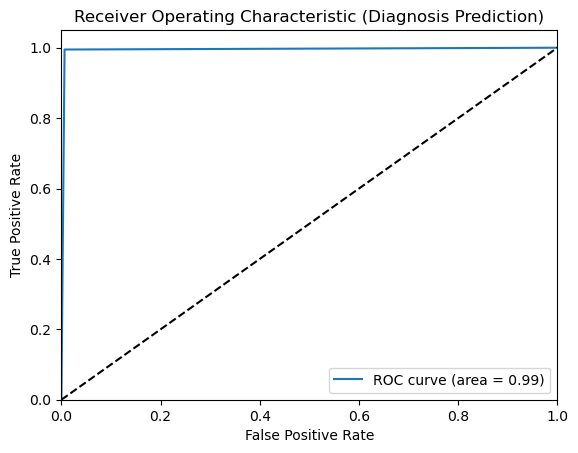

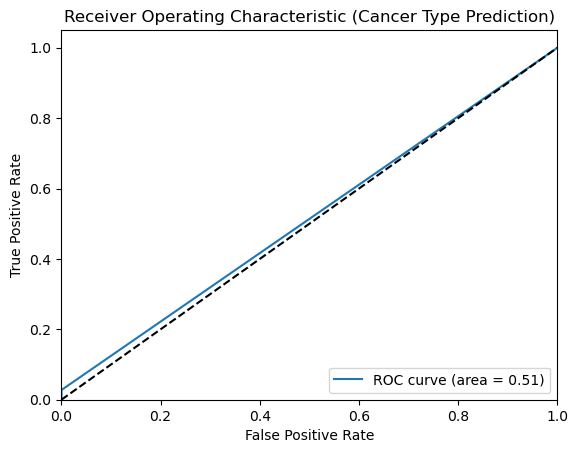

Accuracy for diagnosis prediction: 0.9942471910112359
Accuracy for cancer type prediction: 0.9938333333333333


In [13]:

# Plot the ROC curve for diagnosis prediction
plt.figure()
plt.plot(diagnosis_fpr, diagnosis_tpr, label='ROC curve (area = %0.2f)' % diagnosis_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Diagnosis Prediction)')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve for cancer type prediction
plt.figure()
plt.plot(type_fpr, type_tpr, label='ROC curve (area = %0.2f)' % type_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Cancer Type Prediction)')
plt.legend(loc="lower right")
plt.show()



## Evaluation Model

In [16]:
# Evaluate the models
diagnosis_accuracy = accuracy_score(y_test_selected, diagnosis_predictions)
type_accuracy = accuracy_score(y_test, type_predictions)

print("Accuracy for diagnosis prediction:", diagnosis_accuracy)
print("Accuracy for cancer type prediction:", type_accuracy)



Accuracy for diagnosis prediction: 0.9942471910112359
Accuracy for cancer type prediction: 0.9938333333333333


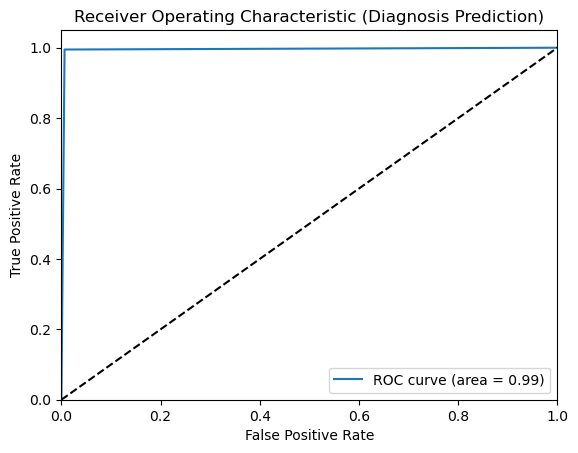

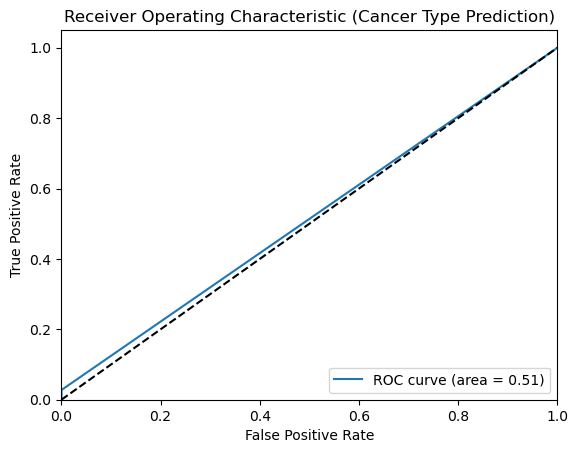

Accuracy for diagnosis prediction: 0.9942471910112359
Accuracy for cancer type prediction: 0.9938333333333333


C:\Users\anton\AppData\Local\Temp\ipykernel_15008\19671073.py:101: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_type.corr(), annot=True, cmap='coolwarm')


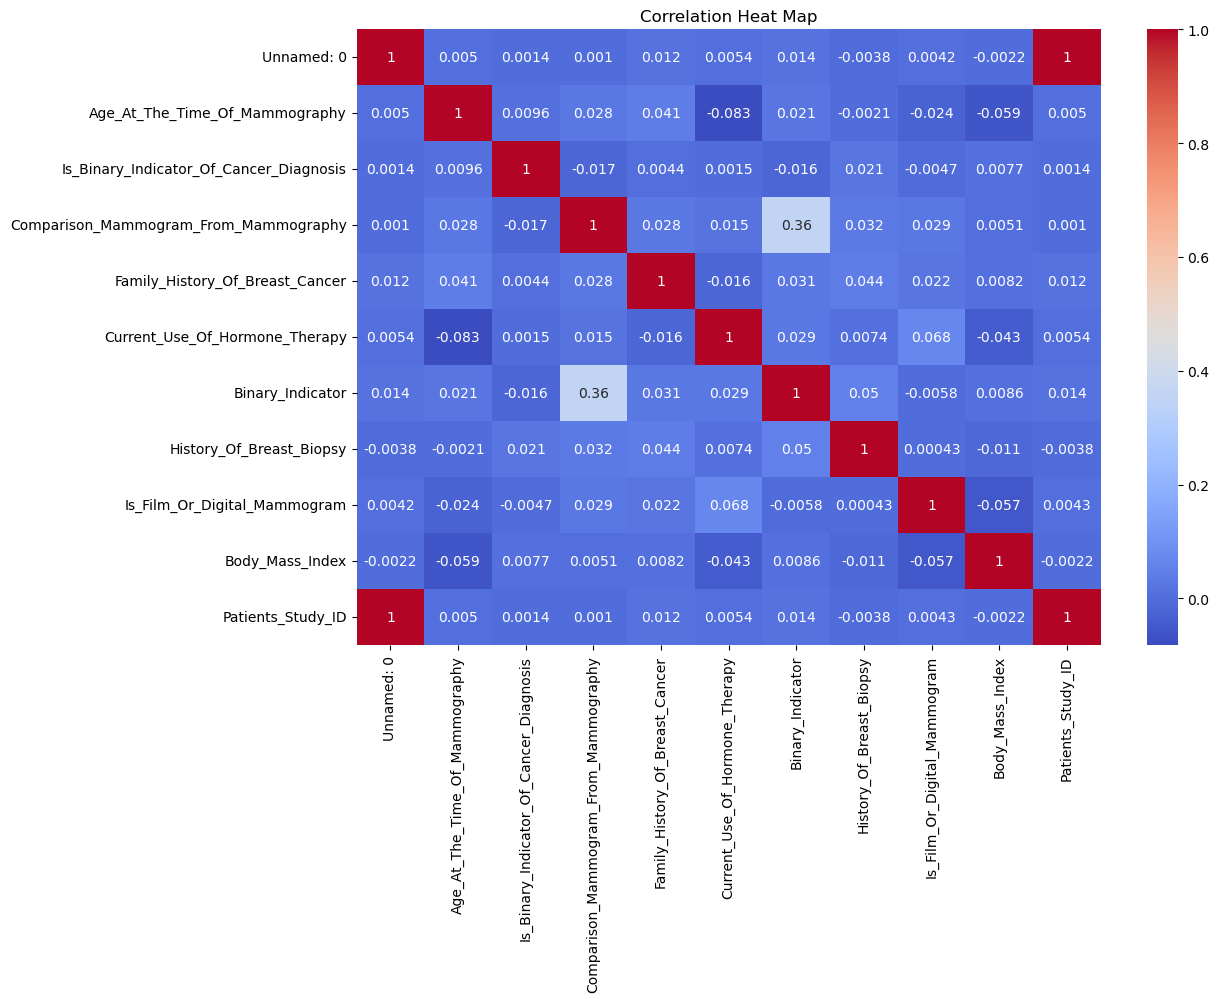

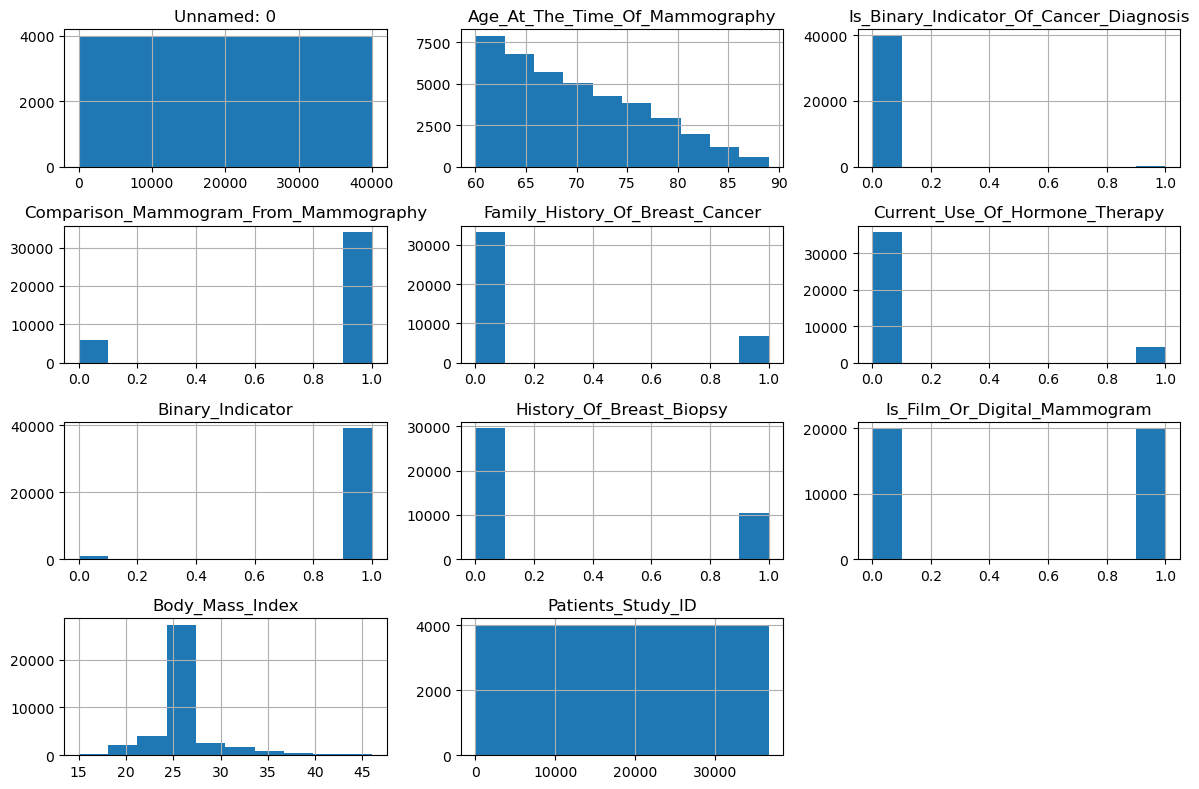

The following features are missing in the DataFrame: ['Radiologists_Assessment_Benign findings', 'Radiologists_Assessment_Needs additional imaging', 'Radiologists_Assessment_Negative', 'Radiologists_Assessment_Probably benign', 'Patients_BI_RADS_Breast_Density_Almost entirely fatty', 'Patients_BI_RADS_Breast_Density_Extremely dense', 'Patients_BI_RADS_Breast_Density_Heterogeneously dense', 'Patients_BI_RADS_Breast_Density_Scattered fibroglandular densities']


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data In Pandas
df = pd.read_csv(r"C:\Users\anton\Documents\Postgraduate Diploma in Data Analytics {PGDDA-JAN 2003}\Year 1  Semester 3\Domain Applications of Predictive Analytics\2023\Project\Project (Draft)\Data\Data Project\clean_data_breast_cancer.csv")

# Drop the 'Cancer_Type' column
df_no_type = df.drop('Cancer_Type', axis=1)

# Split the data into features and target variables
X = df_no_type.loc[:, df_no_type.columns != 'Is_Binary_Indicator_Of_Cancer_Diagnosis']
y = df_no_type.loc[:, df_no_type.columns == 'Is_Binary_Indicator_Of_Cancer_Diagnosis']

# Encode categorical variables
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

# Reshape the target variable using ravel()
y_encoded = y_encoded.values.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=0)

# Balance classes of data using SMOTE (Synthetic Minority Over-sampling Technique)
overSampling = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = overSampling.fit_resample(X_train, y_train)

# Convert oversampled arrays to DataFrames
X_train_resampled = pd.DataFrame(data=X_train_resampled, columns=X_encoded.columns)
y_train_resampled = pd.DataFrame(data=y_train_resampled, columns=['Is_Binary_Indicator_Of_Cancer_Diagnosis'])

# Recursive Feature Elimination (RFE)
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')
X_resampled_selected = rfecv.fit_transform(X_train_resampled, y_train_resampled.values.ravel())

# Train-test split
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_resampled_selected, y_train_resampled.values.ravel(), test_size=0.2, random_state=42)

# Train the random forest model for diagnosis prediction
rf_diagnosis = RandomForestClassifier(random_state=42)
rf_diagnosis.fit(X_train_selected, y_train_selected)

# Train the random forest model for cancer type prediction
rf_type = RandomForestClassifier(random_state=42)
rf_type.fit(X_train, y_train.ravel())

# Make predictions for diagnosis
diagnosis_predictions = rf_diagnosis.predict(X_test_selected)

# Make predictions for cancer type
type_predictions = rf_type.predict(X_test)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for diagnosis prediction
diagnosis_fpr, diagnosis_tpr, diagnosis_thresholds = roc_curve(y_test_selected, diagnosis_predictions, pos_label=1)
diagnosis_auc = auc(diagnosis_fpr, diagnosis_tpr)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for cancer type prediction
type_fpr, type_tpr, type_thresholds = roc_curve(y_test, type_predictions, pos_label=1)
type_auc = auc(type_fpr, type_tpr)

# Plot the ROC curve for diagnosis prediction
plt.figure()
plt.plot(diagnosis_fpr, diagnosis_tpr, label='ROC curve (area = %0.2f)' % diagnosis_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Diagnosis Prediction)')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve for cancer type prediction
plt.figure()
plt.plot(type_fpr, type_tpr, label='ROC curve (area = %0.2f)' % type_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Cancer Type Prediction)')
plt.legend(loc="lower right")
plt.show()

# Evaluate the models
diagnosis_accuracy = accuracy_score(y_test_selected, diagnosis_predictions)
type_accuracy = accuracy_score(y_test, type_predictions)

print("Accuracy for diagnosis prediction:", diagnosis_accuracy)
print("Accuracy for cancer type prediction:", type_accuracy)

# Correlation Heat Map
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_type.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

# Univariate Visualization
df_no_type.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Pair Plot of Selected Features
selected_features = X_encoded.columns[rfecv.support_].tolist()
selected_features.append('Is_Binary_Indicator_Of_Cancer_Diagnosis')

# Verify if the selected features are present in the DataFrame
missing_features = [feature for feature in selected_features if feature not in df_no_type.columns]
if missing_features:
    print("The following features are missing in the DataFrame:", missing_features)
else:
    sns.pairplot(df_no_type[selected_features], hue='Is_Binary_Indicator_Of_Cancer_Diagnosis', palette='husl')
    plt.show()

